In [25]:
from Body import Qcs
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#parameters
κ = 1
ωc = 0
ωe = κ
γ = 0.2 * κ
g = 0.6 * κ
η = 3
ωd = np.linspace(-7, 5, 4000)

In [35]:
# create effective Hamiltonian
Heff = []
Heff.append([(ωc-1j*κ/2), ('ad', 0), ('a', 0)])
Heff.append([(ωe-1j*γ/2), ('sp', 0), ('sm', 0)])
Heff.append([g, ('ad', 0), ('sm', 0)])
Heff.append([g, ('a', 0), ('sp', 0)])

In [36]:
# create Input and output channels
mode1 = [np.sqrt(κ/2), ('a', 0)]
mode2 = [np.sqrt(γ/2), ('sm', 0)]

Input1 = Qcs.Input_channel('b1', mode1, ωd)
Input2 = Qcs.Input_channel('b2', mode2, ωd)
Output = Qcs.Output_channel('c1', mode1)

In [37]:
# calculate second-order ETCF
Result1 = Qcs(Heff, Input1, Output)
Result2 = Qcs(Heff, [Input1, Input2], Output, ratio=[1, η*np.sqrt(κ/γ)])
g2_dc = Result1.calculate_quantity('c1c1')
g2_dce = Result2.calculate_quantity('c1c1')

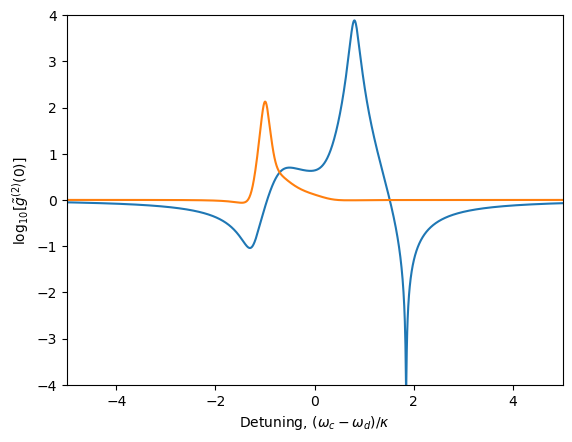

In [38]:
plt.plot(-ωd, np.log10(g2_dce))
plt.plot(-ωd, np.log10(g2_dc))
plt.xlabel(r'Detuning, $(\omega_c-\omega_d)/\kappa$')
plt.ylabel(r'$\log_{10}[\tilde{g}^{(2)}(0)]$')
plt.ylim([-4, 4])
plt.xlim([-5, 5])
plt.show()

In [39]:
g3_dce = Result2.calculate_quantity('c1c1c1')
g4_dce = Result2.calculate_quantity('c1c1c1c1')
g5_dce = Result2.calculate_quantity('c1c1c1c1c1')

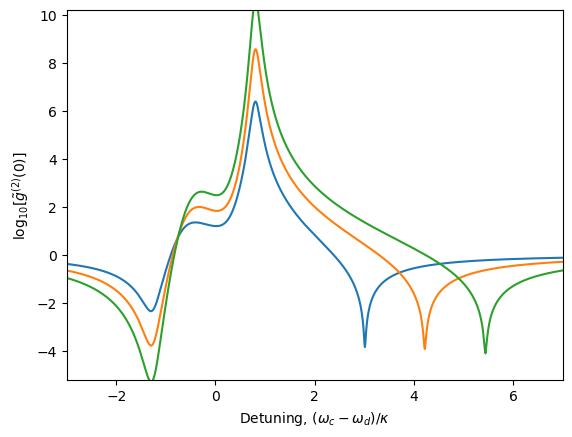

In [40]:
plt.plot(-ωd, np.log10(g3_dce))
plt.plot(-ωd, np.log10(g4_dce))
plt.plot(-ωd, np.log10(g5_dce))
plt.xlabel(r'Detuning, $(\omega_c-\omega_d)/\kappa$')
plt.ylabel(r'$\log_{10}[\tilde{g}^{(2)}(0)]$')
plt.ylim([-5.2, 10.2])
plt.xlim([-3, 7])
plt.show()